## 4. Regression: Optimization of Long-Term Correction of Wind Data Using Regression Models

**Assignment Description**

In this assignment, you will work with realistic data from the wind industry. Vestas, a leading global company in wind energy, is interested in optimizing their methods for generating long-term corrected (LTC) wind data, which are used for planning the locations of new wind farms.

**Context**

Before building a new wind farm, Vestas needs to get an estimate of how much power it can produce. This can be done by running a simulation of the planned wind farm. The primary factors that decide how much power will be produced are: 

-  the turbine type (bigger turbines generally produce more energy), 

- the locations of the turbines (more energy is produced if the turbines are placed so that they do not block each other significantly) and 

- the wind speed and wind direction at the location where the wind farm is planned to be build. 

The turbine type and location is something that Vestas engineers get to decide, but wind is not so easily managed... Therefore, it is important to have a large amount of data to get a precise description of the distribution of wind speeds and wind directions at the potential site. Ideally a wind measuring mast would be build at the place of interest and collect data on wind speeds and wind directions for 20 years or so prior to the wind farm being build. However, the investers would probably become impatient if they had to wait for 20 years before construction could begin. 

So instead, a mast is build that collects data for a few years (typically 1-4 years). To account for more "global" variations in wind from year to year (some years are simply more windy than other years), the data from the mast is then compared to the data based on wind models which covers a much longer time scale. This model data (referred to as "meso" data) can be obtained for any location on Earth, and accounts for large scale wind variations (e.g. due to seasons, geography, Coriolis effect etc.). But it cannot be expected to give a precise description of the wind at a specific location, which is also affected by vegetation, buildings, the local landscape and so on. So in summary, the mast data captures the specific wind conditions for the given site, and the meso data accounts for variations in wind speeds on a longer time scale. Together, the two datasets usually give a good description of the wind at a specific site over a long time period, and therefore can be used to predict the expected power production over a long time span (e.g. 20 years, comparable to the life time of a wind farm).

Below is an illustration comparing a meso and a mast time series. Note that this plot is only for illustration purposes. In reality, meso data typically has a frequency of 1 hour, and mast data has a frequency of 10 minutes. Besides, the figure only illustrates the variations in windspeeds. For the actual simulations, wind directions are also extremely important (e.g. to determine the locations of the turbines such that they don't block each other for the prevalent wind directions).

![Illustration of meso vs mast time series](timeseries_example.png)

In order to run a simulation for a given (potential) site, Vestas needs to obtain a single time series which has the same characteristics as the mast timeseries, but has a time span of 20 years like the meso time series. For this purpose, they currently use a neural network: They train the network on the overlapping parts of the mast and meso time series. Specifically, they train the network to be able to predict the mast wind speeds and wind directions based on the wind speeds and wind directions found in the meso data for the same time stamps. After the neural network has been trained, they feed the meso wind speeds and wind directions for the entire 20 years time span to get a *predicted* "mast" time series covering the 20 years of data found in the meso data. This *predicted* mast time series is called the "long term corrected" (LTC) time series, and is the one on which they base their simulations for the power production at the given site. 

However, traning neural networks is time consuming and expensive! Therefore, Vestas is curious if some kind of linear regression would be able to acheive comparable results. 

**Data**
 
You will have access to two types of time series data:

1) Mast time series data that represent the wind conditions at a specific location based on measurements from a wind measuring mast.

2) Meso time series data that are based on weather measurement models and cover more than 20 years. While these data are less precise and don't exactly match the specific location, they provide a longer historical context.

Note that the mast data for this project is significantly longer than "typical" mast data. This allows cutting the data into training and test sets (or training, validation and test sets). Each set should cover all four seasons.

Your task is to develop a model using regression techniques that can generate LTC wind data. This LTC time series should be long, like the meso time series, but also give an accurate description of the wind conditions at the specific location.

**Objectives and Purpose**
 
The purpose of the assignment is to assess whether regression could be used instead of neural networks, which could potentially save time and money as it is generally quicker to perform a regression than to train a neural network. And the main objective is thus to develop a regression model that can generate LTC time series that are both accurate and cost-effective.

**Requirements**

Please note. We have supplied some examples of how students have previously done the preprocessing to give you some input and thus make the work load a bit less. Feel free to use/reuse the preprocessing steps of these solutions.

1. **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique. Feel free to use or get inspired by previous solutions.

    a. Consider the appropriate intervals for wind speeds and wind directions. No negative wind speeds are allowed, and wind directions should be in an appropriate interval (e.g. [0; 360[ degrees).

    b. Select which ws / wd signals to use. Signals at higher altitude are generally better, but it is even more important to have proper coverage of all seasons.

    c. Find the meso-signals closest in height to the mast-data-signal you are using. Or interpolate the values between 2 or more meso-signals to get the values at the exact mast-signal-height.

    d. Convert the mast data from DK time to UTC time (corresponding to the time zone used in the meso data). Remember to account for summer-time in DK.
    
    e. Resample the mast dataset to have the same frequency as the meso data. The meso data has one record for each hour, the mast data has one record for each 10 min.

        i. Note: You should not convert the ws / wd signals to vector-quantities and use those for the resampling. Resample the ws and wd signal individually instead. The turbines “yaw” to always point toward the incoming wind, so the interesting value is the wind speed and not the wind velocity.  
        ii. Be careful when resampling the wind directions. You don’t want the average of 0 degrees and 359 degrees to become ~180 degrees :-)

    f. Find the overlapping timestamps between the meso data and the resampled mast data. You only want to consider data in this overlapping time period in your training.

2. **Optional: Exploratory analysis:** You may do an exploratory analysis of the data, but this part is not mandatory. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. **(You can skip this part if you want to)**
3. **Model Development:** Use appropriate machine learning principles and methodologies, including model training and testing and perhaps validation, cross-validation, and leave-one-out. You should apply and interpret regression models effectively for this task.
4. **Model Evaluation:** Evaluate the developed model using appropriate metrics such as Mean Squared Error (MSE), R-squared (R²), etc. The evaluation should give an indication of the usefulness of your model in predicting wind conditions accurately. 
**Optional**: If you did step 2 above, in addition to calculating the above metric for your predicted time series, also consider comparing the distributions of the wind speeds in the predicted and the actual (resampled) mast data. That is, calculate the Weibull A- and k-parameters for both distributions, and find the error in these between your fit and the true data. "Error-in-A" and "Error-in-k" are the most used quantities to evaluate the long term correction process in the wind industry :-)
5. **Documentation and Presentation:** Clearly document the steps, methodologies, and tools you used during the process. Present the results of your model in a clear and effective manner. This documentation should be comprehensive enough for someone to replicate your process and understand your results. Hand-in as one Jupyter Notebook.


**Some additional comments**

They (Vestas) have also tried running their own LTC algorithm on some of the data (they chose the 77m wind speed and wind direction signals from the Risø dataset), and this yielded good results. They assumed that the data was in Danish time, so they believe that is the case.

As you can see, there is quite a focus on wind speeds (as they determine the amount of power produced). However, they know that their neural network operates by training on the different components of wind speed separately (meaning training one network on the x-component of the wind and another network on the y-component of the wind) and then combining them at the end. You may consider this method too. They are not sure if it yields better performance than training on wind speed and wind direction separately...but if time permits, give it a go.

**About the data**

The mast datasets are in netCDF format. It's quite easy to work with in Python (not sure if you've used it before?). In one of the folders, a test.py file is included that demonstrate how to load the dataset and access the most relevant mast signals.

The mast data has a measurement frequency of 10 minutes, while the meso data has a frequency of 1 hour. Therefore, you will need to resample the mast data to a 1-hour frequency before you can use it (see requirement 1.e above). Vestas does the same with their data. As mentioned you should be careful when resampling the angles so that the average of 0 degrees (north) and 359 degrees doesn't end up being approximately 180 degrees.

The data is publicly available. You can read more about it here:

*Risø:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/risoe_m.md

Data: https://data.dtu.dk/articles/dataset/Wind_resource_data_from_the_tall_Ris_met_mast/14153204 (this is the "DOI"-link from the description)


*Børglum:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/borglum.md

Data: https://data.dtu.dk/articles/dataset/Resource_data_from_the_Borglum_mast/14153231

The two meso datasets come from Vestas' climate library, and the meso data is in UTC time. They don't think you need anything other than the "wind speed" (WSP) and "wind direction" (WDIR) signals. They believe it's most appropriate to either use the height closest to the mast height (for example, if you're using the wind speed signal ws125 and the wind direction signal wd125 from the Risø dataset, you should use WSP120 and WDIR120 from the meso dataset) or use multiple signals and interpolate to the desired height (125m) (see the requirements above).

**Final comments**

In a perfect world, you can do all of the above. The assignment is "free" in the sense that you should give the above a go and do your best. Remember, there is no right answer. This assignment is a real-world machine learning task and not a "made-up" school task. There are software engineers at Vestas working on exactly the same task (albeit with a different dataset, which they arent' allowed to share with us). But try to discuss the problem in your group and distribute the work among you. You can even collaborate with other groups or find inspiration in their approach.

And remember. These portfolio assignments are not meant as "learn stuff in class and apply to assignment" - they are part of the learning process, and not simply a documentation of what you have learned. They should be seen as "learning by doing"-type assignments.

In session 8, we will do a Q/A if you have any questions. But as mentioned, try to give it a go. 

### We are going to use Risoe Data. Let's start with mast data preprocessing

In [41]:
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta

file_path_risoe = 'risoe_m_all.nc'

signals_risoe = ['ws77', 'wd77', 'ws125', 'wd125']

base_date_risoe = datetime(1995, 11, 20, 16, 25, 0)

# Get the Risoe dataset:
dataset = nc.Dataset(file_path_risoe, 'r')

# List the variables in the dataset
print("Variables in the netCDF file:")
for var_name in dataset.variables:
    print(var_name)

time_minutes = np.array(dataset.variables['time'])

print(time_minutes)

# Convert time values to timestamp strings
time = []
for minutes in time_minutes:
	time_delta = timedelta(minutes=int(minutes))
	timestamp = base_date_risoe + time_delta
	time.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
 
print(f"time:\n {time[:10]} - {time[-1]}")

for signal in signals_risoe:
	values = np.array(dataset.variables[signal])
	print(f'{signal}:\n {values[:10]} - {values[-10:-1]}')

Variables in the netCDF file:
time
ws44
ws44_qc
ws77
ws77_qc
ws125
ws125_qc
wd77
wd77_qc
wd125
wd125_qc
t003
t003_qc
t044
t044_qc
t118
t118_qc
td01
td01_qc
rain
rain_qc
press
press_qc
rhum
rhum_qc
grad
grad_qc
[      0      10      20 ... 6370991 6371001 6371011]


time:
 ['1995-11-20 16:25:00', '1995-11-20 16:35:00', '1995-11-20 16:45:00', '1995-11-20 16:55:00', '1995-11-20 17:05:00', '1995-11-20 17:15:00', '1995-11-20 17:25:00', '1995-11-20 17:35:00', '1995-11-20 17:45:00', '1995-11-20 17:55:00'] - 2007-12-31 23:56:00
ws77:
 [3.36 3.05 3.59 3.87 4.74 4.91 4.98 5.39 5.76 5.52] - [8.14 8.71 6.82 7.26 7.24 6.04 6.97 8.17 6.66]
wd77:
 [205. 205. 204. 202. 201. 206. 203. 203. 193. 200.] - [0. 0. 0. 0. 0. 0. 0. 0. 0.]
ws125:
 [3.04 3.17 3.64 3.77 4.28 4.91 5.35 5.58 5.75 5.38] - [nan nan nan nan nan nan nan nan nan]
wd125:
 [208. 214. 209. 209. 212. 213. 210. 206. 207. 205.] - [0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [42]:
import pandas as pd

# Lets put this data into dataframe
# For our model we are going to only use signals about wind speed and direction
# as they were mentioned in description as most important ones

df = pd.DataFrame()

# use timestamp as index in our datafram
df.index = pd.to_datetime(time)

for signal in signals_risoe:
    	df[signal] = np.array(dataset.variables[signal])
		

# Lets see the head

df.head()

,ws77,wd77,ws125,wd125
1995-11-20 16:25:00,3.36,205.0,3.04,208.0
1995-11-20 16:35:00,3.05,205.0,3.17,214.0
1995-11-20 16:45:00,3.59,204.0,3.64,209.0
1995-11-20 16:55:00,3.87,202.0,3.77,209.0
1995-11-20 17:05:00,4.74,201.0,4.28,212.0


In [43]:
# Descriptive info

df.describe()

,ws77,wd77,ws125,wd125
count,621607.000000,627811.000000,541705.000000,558830.000000
mean,6.882234,193.137086,7.647368,186.456887
std,3.297613,98.183961,3.600278,94.825163
min,0.000000,0.000000,0.000000,0.000000
25%,4.550000,119.000000,5.110000,125.000000
50%,6.630000,209.000000,7.530000,191.000000
75%,8.830000,274.000000,9.950000,260.000000
max,32.170000,360.000000,34.300000,360.000000


In [44]:
# how many null values each column has

display(df.isnull().sum())

# and also the procentage

display(df.isnull().sum()/len(df) * 100)


ws77      6752
wd77       548
ws125    86654
wd125    69529
dtype: int64

ws77      1.074545
wd77      0.087211
ws125    13.790524
wd125    11.065171
dtype: float64

In [45]:
# how many negative speed values (wrong values) signal from each altitude have
# how many wrong angles there are in wind directions

for signal in signals_risoe:
    if 'ws' in signal:
        print(f'{signal} has {len(df[df[signal] < 0])} negative values')
    else:
        print(f'{signal} has {len(df[(df[signal] < 0) | (df[signal] > 360)])} wrong angle values')



ws77 has 0 negative values
wd77 has 0 wrong angle values
ws125 has 0 negative values
wd125 has 0 wrong angle values


In [46]:
# lets see how many signal records we have in each season

#tmp season column

df['season'] = df.index.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'})


print("ws77:\n",df.groupby('season')['ws77'].count())

print("ws125:\n", df.groupby('season')['ws125'].count())


# coverage percentage of signals in every season

print("ws77:\n",df.groupby('season')['ws77'].count()/df['ws77'].count() * 100)

print("ws125:\n", df.groupby('season')['ws125'].count()/df['ws125'].count() * 100)



ws77:
 season
Autumn    156303
Spring    157746
Summer    157938
Winter    149620
Name: ws77, dtype: int64
ws125:
 season
Autumn    140901
Spring    129813
Summer    142994
Winter    127997
Name: ws125, dtype: int64
ws77:
 season
Autumn    25.144987
Spring    25.377127
Summer    25.408015
Winter    24.069871
Name: ws77, dtype: float64
ws125:
 season
Autumn    26.010652
Spring    23.963781
Summer    26.397024
Winter    23.628543
Name: ws125, dtype: float64


 Even though signals from 125m altitude should be theoritically better, we are going to go with signals from 77m, as they have much less missing values and have very good season coverage (very close to 25% for each season) (better than coverage of 125m signals)

In [47]:
# drop tmp column and signals for altitude we are not going to use
df = df.drop(columns=['season', 'ws125', 'wd125'])


In [48]:
df

,ws77,wd77
1995-11-20 16:25:00,3.36,205.0
1995-11-20 16:35:00,3.05,205.0
1995-11-20 16:45:00,3.59,204.0
1995-11-20 16:55:00,3.87,202.0
1995-11-20 17:05:00,4.74,201.0
...,...,...
2007-12-31 23:16:00,6.04,0.0
2007-12-31 23:26:00,6.97,0.0
2007-12-31 23:36:00,8.17,0.0
2007-12-31 23:46:00,6.66,0.0


In [49]:
# let's change timestamp from danish time to utc

def convert_series_to_utc(date):

    # Get start and end dates for daylight saving time in Denmark
    dst_start = datetime(date.year, 3, 31) - timedelta(days=datetime(date.year, 3, 31).weekday() + 1)
    dst_end = datetime(date.year, 10, 31) - timedelta(days=datetime(date.year, 10, 31).weekday() + 1)

    # Determine if the input time is in daylight saving time
    is_dst = dst_start <= date < dst_end

    # Adjust the UTC offset accordingly
    if is_dst:
        utc_offset = timedelta(hours=2)
    else:
        utc_offset = timedelta(hours=1)

    # Convert the Danish time to UTC
    utc_time = date - utc_offset

    return utc_time 

# Display head with danish time
display(df.head())

df.index = df.index.map(convert_series_to_utc)

# Display head with UTC time
display(df.head())




,ws77,wd77
1995-11-20 16:25:00,3.36,205.0
1995-11-20 16:35:00,3.05,205.0
1995-11-20 16:45:00,3.59,204.0
1995-11-20 16:55:00,3.87,202.0
1995-11-20 17:05:00,4.74,201.0


,ws77,wd77
1995-11-20 15:25:00,3.36,205.0
1995-11-20 15:35:00,3.05,205.0
1995-11-20 15:45:00,3.59,204.0
1995-11-20 15:55:00,3.87,202.0
1995-11-20 16:05:00,4.74,201.0


In [50]:
# Let's remove nan values before resampling

df = df.dropna()


array([[<Axes: title={'center': 'Wind speed at 77m'}>],
       [<Axes: title={'center': 'Wind direction at 77m'}>]], dtype=object)

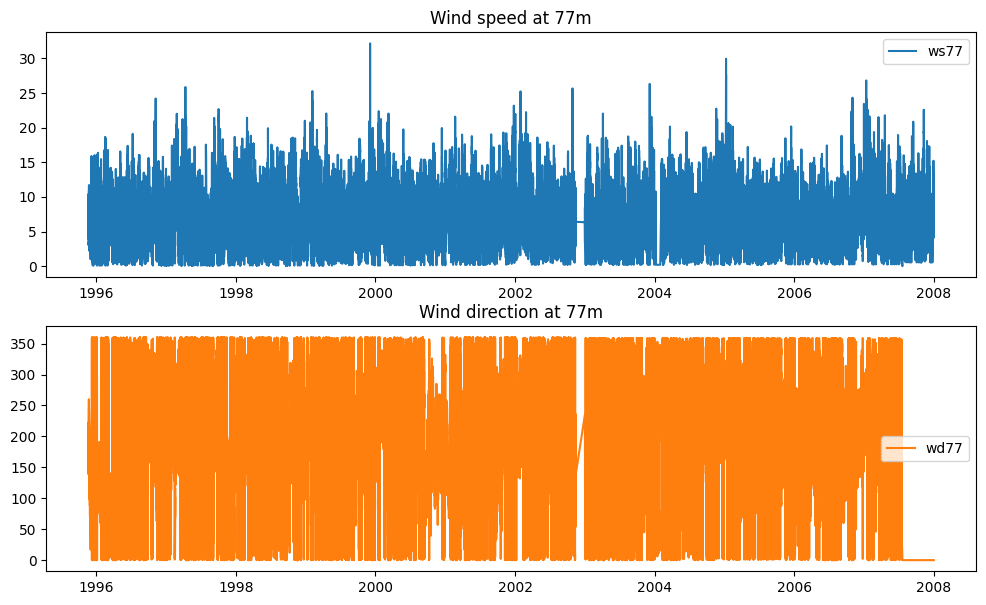

In [51]:
# Lets plot wind speed and wind direction
df.plot(y=['ws77', 'wd77'], subplots=True, layout=(2,1), figsize=(12, 7), title=['Wind speed at 77m', 'Wind direction at 77m'], sharex=False)

We can notice that something weird goes during second half of 2007, that wind direction suddenly drops to 0 and doesn't change at all. We will cut this period of data from our dataset, cause it's looks like error happened, there and data stops following all the patterns

array([[<Axes: title={'center': 'Wind speed at 77m'}>],
       [<Axes: title={'center': 'Wind direction at 77m'}>]], dtype=object)

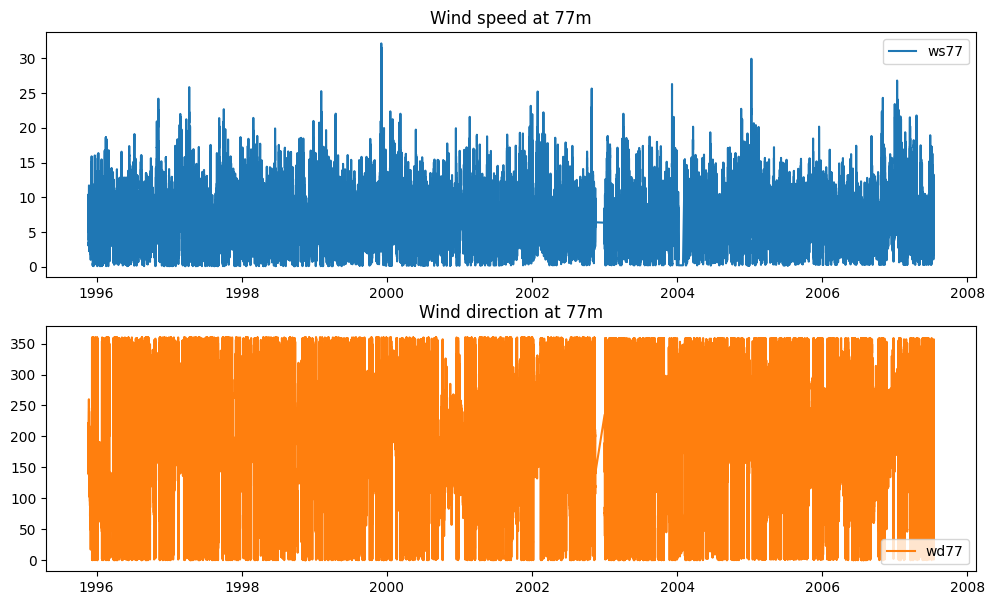

In [52]:
# Find index of record when wind direction is first non-zero value coming from the end
first_non_zero_index = df[df['wd77'] != 0].index[-1]

df = df.loc[:first_non_zero_index ]

# let's plot the data again
df.plot(y=['ws77', 'wd77'], subplots=True, layout=(2,1), figsize=(12, 7), title=['Wind speed at 77m', 'Wind direction at 77m'], sharex=False)

Now the data looks much better without weird anomaly :D

In [53]:
# Lets resample mast data from 10 minuts frequency to hourly frequency
# We are going to resample speed using mean and direction using circular mean (as it is circular data)
ws_resampled= df['ws77'].resample('h').mean()



def circular_mean(degrees):
    radians = np.radians(degrees)
    sines = np.sin(radians)
    cosines = np.cos(radians)

    mean_sine = sines.mean()
    mean_cosine = cosines.mean()

    mean_angle = np.arctan2(mean_sine, mean_cosine)

    new_degrees = np.degrees(mean_angle)

    return new_degrees if new_degrees >= 0 else new_degrees + 360

wd_resampled = df['wd77'].resample('h').apply(circular_mean)

resampled_df = pd.DataFrame({'ws77': ws_resampled, 'wd77': wd_resampled})

#Dropping nans

resampled_df = resampled_df.dropna()

# assert that we have no more missing values

assert resampled_df.isnull().sum().sum() == 0

In [54]:
# Let's see the statistics again, this time for resampled data

resampled_df.describe()

,ws77,wd77
count,99726.000000,9.972600e+04
mean,6.880892,2.009434e+02
std,3.256834,9.212515e+01
min,0.080000,5.318462e-16
25%,4.586667,1.273312e+02
50%,6.616667,2.150028e+02
75%,8.807667,2.756733e+02
max,30.860000,3.600000e+02


## Let's focus our attention on meso data for a while

In [55]:
meso_df = pd.read_csv('meso_Risoe.csv')

meso_df.head()

,TIMESTAMP,HGT,RHO060,RHO080,RHO100,RHO120,RHO140,RHO160,RHO180,RHO200,...,TKE_PBL220,RH060,RH080,RH100,RH120,RH140,RH160,RH180,RH200,RH220
0,2001-06-10 15:00:00,7.77,1.234208,1.232239,1.230234,1.228201,1.226122,1.224005,1.221824,1.219543,...,0.1,69.34,69.59,69.78,69.91,69.88,69.70,69.36,68.77,68.25
1,2001-06-10 16:00:00,7.77,1.230668,1.228701,1.226703,1.224679,1.222648,1.220613,1.218572,1.216524,...,0.2,63.85,64.41,64.98,65.55,66.13,66.71,67.30,67.89,68.49
2,2001-06-10 17:00:00,7.77,1.230054,1.228041,1.226011,1.223966,1.221926,1.219891,1.217852,1.215805,...,0.1,63.23,63.78,64.35,64.95,65.57,66.21,66.84,67.49,68.13
3,2001-06-10 18:00:00,7.77,1.229966,1.227930,1.225889,1.223844,1.221794,1.219739,1.217687,1.215639,...,0.1,64.66,65.03,65.48,66.01,66.55,67.12,67.70,68.31,68.93
4,2001-06-10 19:00:00,7.77,1.233801,1.231368,1.228940,1.226516,1.224150,1.221833,1.219564,1.217368,...,0.1,65.39,64.26,63.19,62.19,61.58,61.29,61.45,62.27,63.14


In [56]:
# lets print all the columns

meso_df.columns

Index(['TIMESTAMP', 'HGT', 'RHO060', 'RHO080', 'RHO100', 'RHO120', 'RHO140',
       'RHO160', 'RHO180', 'RHO200', 'RHO220', 'TC060', 'TC080', 'TC100',
       'TC120', 'TC140', 'TC160', 'TC180', 'TC200', 'TC220', 'WSP060',
       'WSP080', 'WSP100', 'WSP120', 'WSP140', 'WSP160', 'WSP180', 'WSP200',
       'WSP220', 'WDIR060', 'WDIR080', 'WDIR100', 'WDIR120', 'WDIR140',
       'WDIR160', 'WDIR180', 'WDIR200', 'WDIR220', 'PRS060', 'PRS080',
       'PRS100', 'PRS120', 'PRS140', 'PRS160', 'PRS180', 'PRS200', 'PRS220',
       'TK060', 'TK080', 'TK100', 'TK120', 'TK140', 'TK160', 'TK180', 'TK200',
       'TK220', 'TKE_PBL060', 'TKE_PBL080', 'TKE_PBL100', 'TKE_PBL120',
       'TKE_PBL140', 'TKE_PBL160', 'TKE_PBL180', 'TKE_PBL200', 'TKE_PBL220',
       'RH060', 'RH080', 'RH100', 'RH120', 'RH140', 'RH160', 'RH180', 'RH200',
       'RH220'],
      dtype='object')

We can see that data is gathered from different heights (60m, 80m, 100m, 120m, 140m, 160m, 180m, 200m, 220m). We are going to only use data gathered from 80m as our mast data is from 77m height, so this is the closet height we can get. Vestas recommends that we only use wind speed and wind directions, so we are going to not use rest of meso data

In [57]:
# lets keep columns we are going to use

meso_df = meso_df[['TIMESTAMP', 'WSP080', 'WDIR080']]

# lets make the timestamp our index

meso_df.index = pd.to_datetime(meso_df['TIMESTAMP'])

meso_df = meso_df.sort_index()

meso_df = meso_df.drop(columns=['TIMESTAMP'])

meso_df.head()

,WSP080,WDIR080
TIMESTAMP,,
2000-01-01 07:00:00,5.83,209.09
2000-01-01 08:00:00,6.13,204.21
2000-01-01 09:00:00,6.69,204.75
2000-01-01 10:00:00,6.37,211.50
2000-01-01 11:00:00,6.20,217.37


In [58]:
# Lets plot percentage of missing values in each column

display(meso_df.isnull().sum()/len(meso_df) * 100)

# no missing values!!!

# lets see the statistics

meso_df.describe()



WSP080     0.0
WDIR080    0.0
dtype: float64

,WSP080,WDIR080
count,204288.000000,204288.000000
mean,6.951803,202.551547
std,3.118094,89.264637
min,0.030000,0.000000
25%,4.750000,133.810000
50%,6.760000,218.170000
75%,8.870000,273.560000
max,26.130000,360.000000


In [59]:
# Lets' jon meso and mast data based on index (timestamp)

all_data = pd.concat([resampled_df, meso_df], axis=1, join='inner')

all_data

# print number of nans

display(all_data.isnull().sum())

ws77       0
wd77       0
WSP080     0
WDIR080    0
dtype: int64

### Basic preprocessing is done, lets do some very basic exploratory analysis

Distribution of ws77


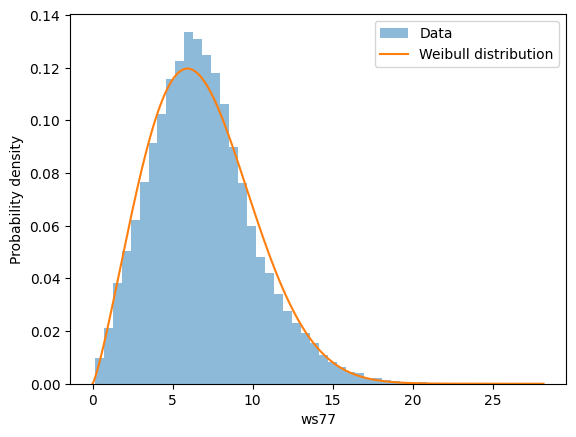

Distribution of WSP080


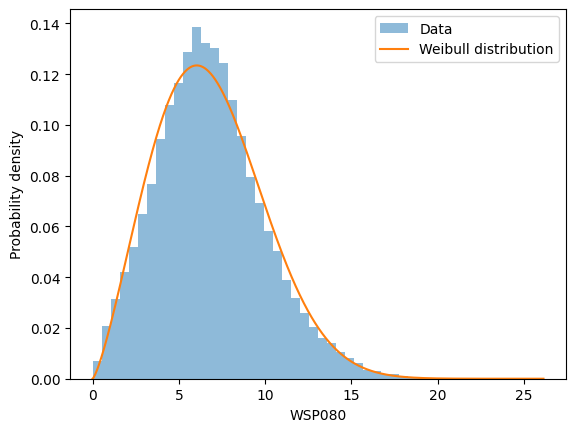

Distribution of ws77 before resampling


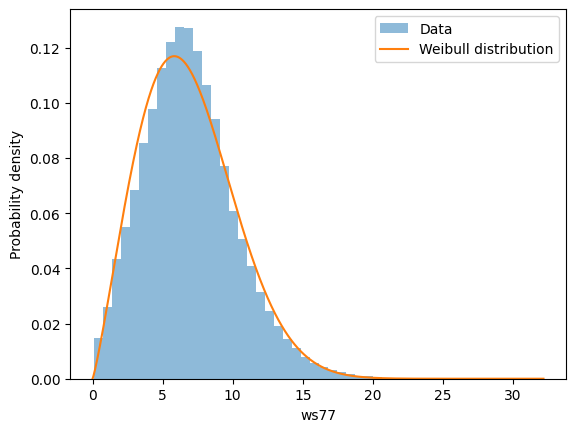

(2.1691742799788436, 7.753225747832017)

In [60]:
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

def plot_weibull(data : pd.Series):

    # Fit the Weibull distribution to the data
    shape, loc, scale = weibull_min.fit(data, floc=0)

    x = np.linspace(0, data.max(), 1000)

    # Calculate the probability density function
    pdf = weibull_min.pdf(x, shape, loc, scale)

    # Plot the data and the Weibull distribution
    plt.hist(data, bins=50, density=True, alpha=0.5, label='Data')
    plt.plot(x, pdf, label='Weibull distribution')
    plt.xlabel(f'{data.name}')
    plt.ylabel('Probability density')
    plt.legend()
    plt.show()

    return shape, scale


for column in all_data.columns:
    if "ws" in column.lower():
        print(f"Distribution of {column}")
        plot_weibull(all_data[column])

print("Distribution of ws77 before resampling")
plot_weibull(df['ws77'])


As we can see wind speed data from meso and mast (pre and after resampling) follow weibull distribution nicely, which is what we would expect when dealing with wind data.

<Axes: >

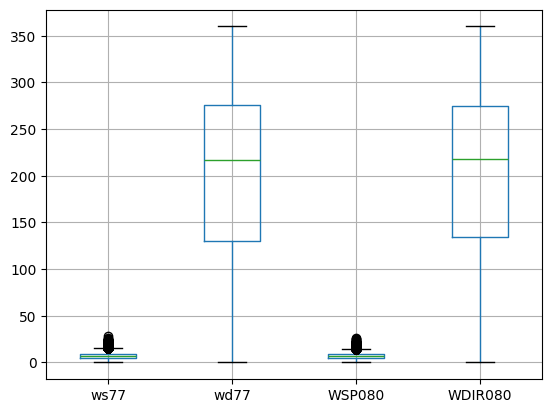

In [61]:
# lets do plot boxplot to see if there are any outliers

all_data.boxplot()

There are no outliers in wind direction data, which makes sense as data has to be in range of 0-360 degrees. It looks like there could be some candidates for outliers in wind speed data, but the distribution of this data is very nice (so we don't want to mess it up) + the wind can probably behave unpredictably at times + we don't have enough domain knowledge, so we are going to leave it as it is.

### Developing model

Because we are dealing with time-series data, we would like to predict future data based on past data, which means that normal train-test split is not going to work. We are going to use time series split from sklearn, that guarantes that random bits of data that we take for training are always before the data we take for testing. Then for optimizing hyperparameters we are going to use cross validation built into sklearn methods.
We are going to create a models to predict mast wind speed and then a model to predict mast wind direction.

In [62]:
from sklearn.model_selection import TimeSeriesSplit

# first lets build model for wind speed
tscv = TimeSeriesSplit(n_splits=5)
X = all_data.drop(columns=['ws77'])
y = all_data['ws77']


for train_index, test_index in tscv.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

print("Train set:")
display(X_train.head())

print("Test set:")
display(X_test.head())






Train set size: 53105
Test set size: 10620
Train set:


,wd77,WSP080,WDIR080
2000-01-01 07:00:00,183.502033,5.83,209.09
2000-01-01 08:00:00,194.212940,6.13,204.21
2000-01-01 09:00:00,201.995414,6.69,204.75
2000-01-01 10:00:00,196.499314,6.37,211.50
2000-01-01 11:00:00,201.003968,6.20,217.37


Test set:


,wd77,WSP080,WDIR080
2006-04-28 21:00:00,342.867687,3.52,305.20
2006-04-28 22:00:00,346.613971,3.32,283.01
2006-04-28 23:00:00,331.976731,5.06,291.08
2006-04-29 00:00:00,347.843691,5.02,303.18
2006-04-29 01:00:00,346.870830,4.48,315.12


In [63]:
# Now we can scale our data, we do this after splitting to avoid data leakage
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [64]:
# Lets start with ordinary least squares regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()

regressor.fit(X_train_scaled, y_train)
preds_train = regressor.predict(X_train_scaled)
preds_test = regressor.predict(X_test_scaled)

print(f"MSE on train: {mean_squared_error(y_train, preds_train)}")
print(f"MSE on test: {mean_squared_error(y_test, preds_test)}")
print(f"R^2 score on train: {regressor.score(X_train_scaled, y_train)}")
print(f"R^2 score on test: {regressor.score(X_test_scaled, y_test)}")

MSE on train: 2.7861820443921967
MSE on test: 2.9541862371374092
R^2 score on train: 0.7265780002061557
R^2 score on test: 0.7428310187350404


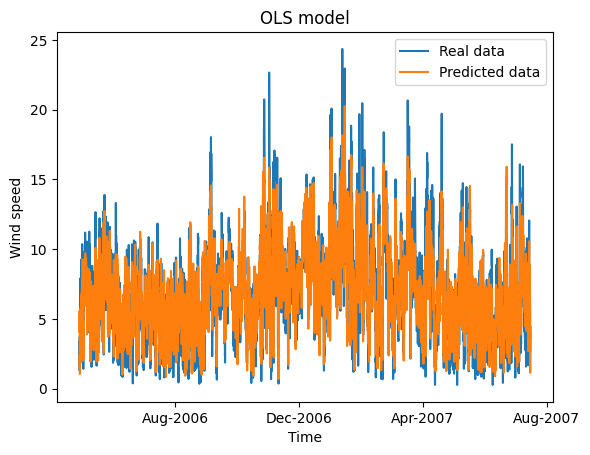

In [65]:
# Lets plot real data vs predicted data as timeseries
# only havnign years as y ticks
from matplotlib.dates import DateFormatter, MonthLocator 

def plot_real_vs_predicted(y_test, preds_test, var_name, title):

    plt.plot(y_test.index, y_test, label='Real data')
    plt.plot(y_test.index, preds_test, label='Predicted data')
    plt.xlabel('Time')
    plt.ylabel(var_name)
    plt.title(title)

    # x ticks display only every fourth month
    plt.gca().xaxis.set_major_locator(MonthLocator(interval=4))
    # Format x-axis tick labels as month-year
    plt.gca().xaxis.set_major_formatter(DateFormatter('%b-%Y'))

    plt.legend()

    plt.show()

plot_real_vs_predicted(y_test, preds_test, 'Wind speed', "OLS model")


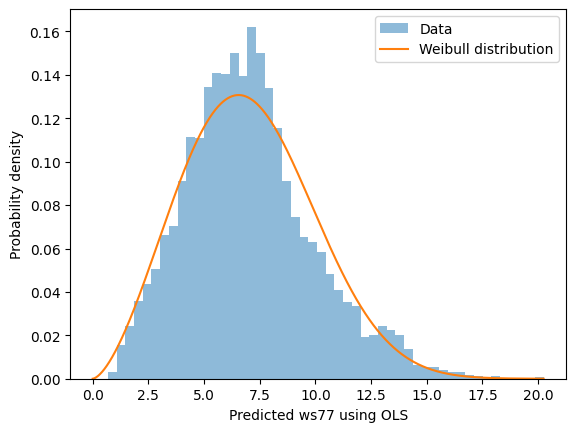

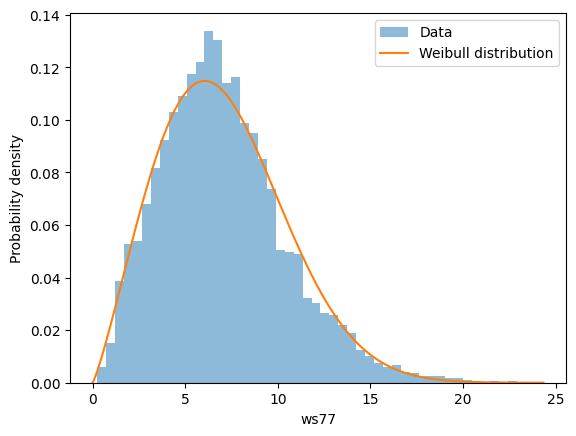

Error-in-K = 0.38201247456539456
Error-in-A = 0.051056890082550765


In [66]:
# lets plot predicted weibull distribution and calculate error in k and a parameters

k_pred, a_pred = plot_weibull(pd.Series(preds_test, name='Predicted ws77 using OLS'))

k_real, a_real = plot_weibull(y_test)

print(f"Error-in-K = {abs(k_pred - k_real)}")
print(f"Error-in-A = {abs(a_pred - a_real)}")

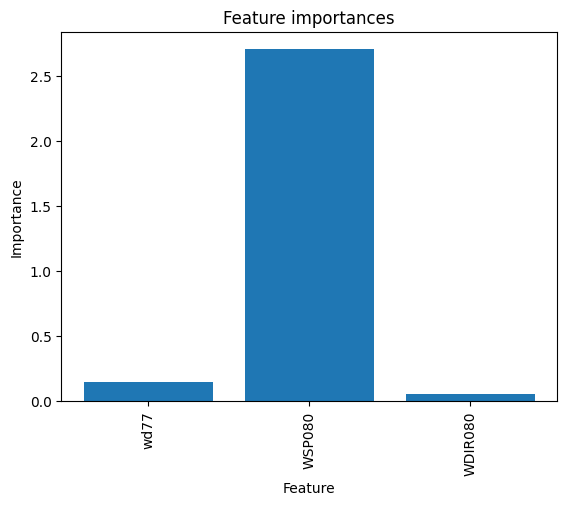

In [67]:
def plot_feature_importances(regressor):

    feature_importances = regressor.coef_
    plt.bar(X.columns, feature_importances)
    plt.xticks(rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature importances')
    plt.show()

plot_feature_importances(regressor)

In [68]:
# Now let's try Ridge regression, and we are going to use cross validation to find the best alpha
from sklearn.linear_model import RidgeCV

alphas = 10**np.linspace(10,-2,100)*0.5
cv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', cv=5)
cv.fit(X_train, y_train)

best_alpha = cv.alpha_

print(f"Best alpha: {best_alpha}")

Best alpha: 4.055654153948428


MSE on train: 2.78618208776521
MSE on test: 2.954197329949808
R^2 score on train: 0.7265779959497447
R^2 score on test: 0.7428300530791763


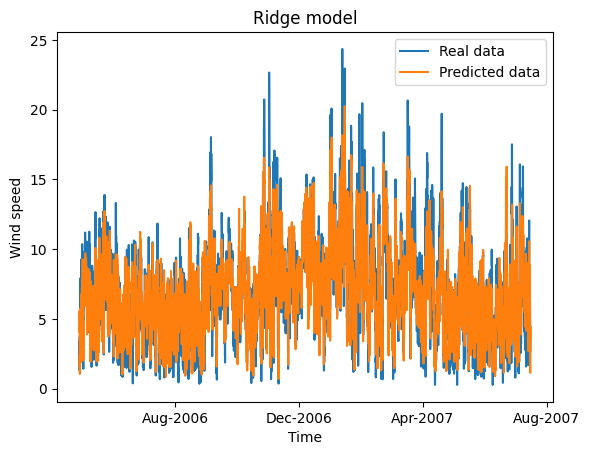

In [69]:
# Now we can train Ridge regression with the best alpha

from sklearn.linear_model import Ridge


regressor = Ridge(alpha=best_alpha)

regressor.fit(X_train_scaled, y_train)
preds_train = regressor.predict(X_train_scaled)
preds_test = regressor.predict(X_test_scaled)

print(f"MSE on train: {mean_squared_error(y_train, preds_train)}")
print(f"MSE on test: {mean_squared_error(y_test, preds_test)}")
print(f"R^2 score on train: {regressor.score(X_train_scaled, y_train)}")
print(f"R^2 score on test: {regressor.score(X_test_scaled, y_test)}")


plot_real_vs_predicted(y_test, preds_test, 'Wind speed', "Ridge model")


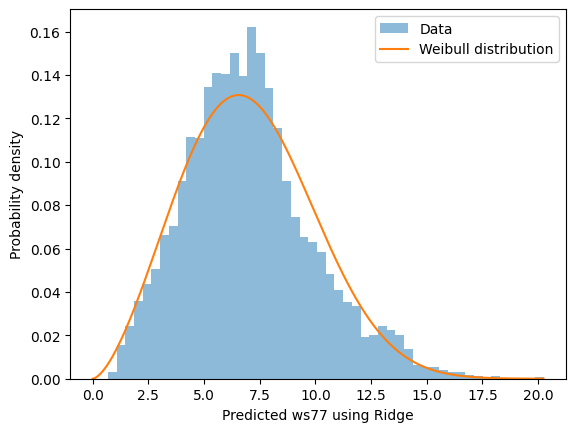

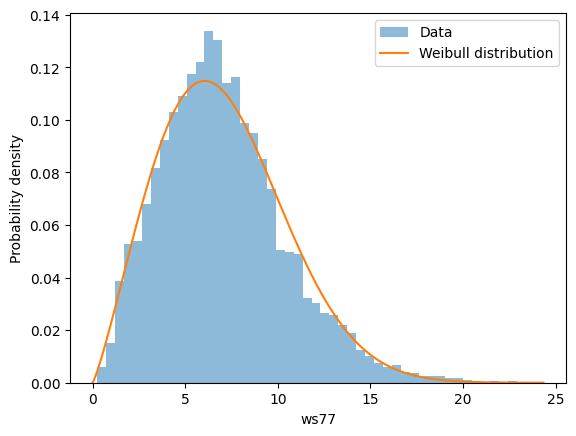

Error-in-K = 0.38224945657964104
Error-in-A = 0.051067040067965586


In [70]:
# lets plot predicted weibull distribution and calculate error in k and a parameters

k_pred, a_pred = plot_weibull(pd.Series(preds_test, name='Predicted ws77 using Ridge'))

k_real, a_real = plot_weibull(y_test)

print(f"Error-in-K = {abs(k_pred - k_real)}")
print(f"Error-in-A = {abs(a_pred - a_real)}")

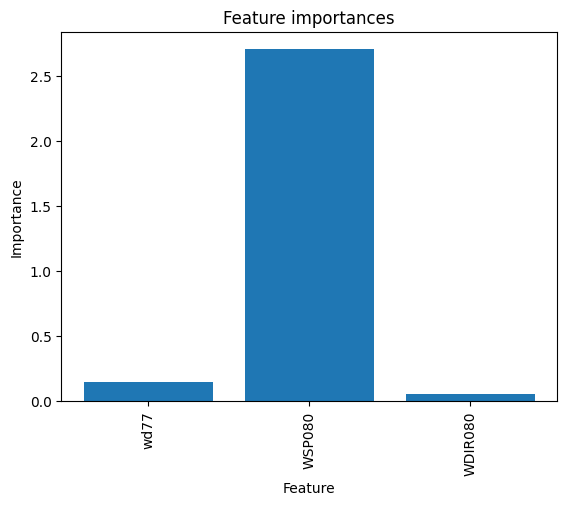

In [71]:
plot_feature_importances(regressor)

In [72]:
# Now let's try Lasso regression, and we are going to use cross validation to find the best alpha

from sklearn.linear_model import LassoCV

alphas = 10**np.linspace(10,-2,100)*0.5
cv = LassoCV(alphas = alphas, cv=5)

cv.fit(X_train, y_train)

best_alpha = cv.alpha_

print(f"Best alpha: {best_alpha}")

Best alpha: 0.005


MSE on train: 2.786232136598438
MSE on test: 2.9549914640288573
R^2 score on train: 0.726573084407049
R^2 score on test: 0.7427609218072444


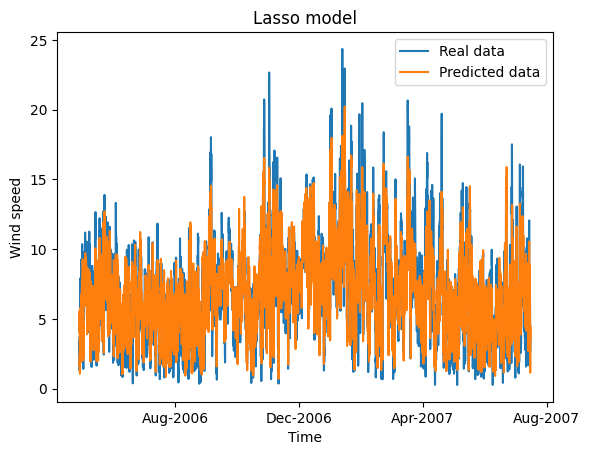

In [73]:
# Now we can train Lasso regression with the best alpha

from sklearn.linear_model import Lasso

regressor = Lasso(alpha=best_alpha)

regressor.fit(X_train_scaled, y_train)
preds_train = regressor.predict(X_train_scaled)
preds_test = regressor.predict(X_test_scaled)

print(f"MSE on train: {mean_squared_error(y_train, preds_train)}")
print(f"MSE on test: {mean_squared_error(y_test, preds_test)}")
print(f"R^2 score on train: {regressor.score(X_train_scaled, y_train)}")
print(f"R^2 score on test: {regressor.score(X_test_scaled, y_test)}")

plot_real_vs_predicted(y_test, preds_test, 'Wind speed', "Lasso model")

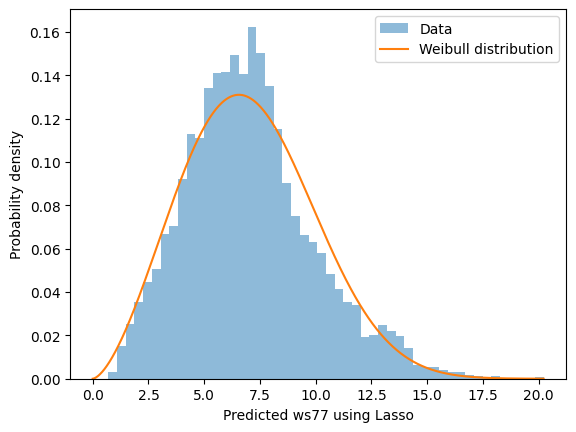

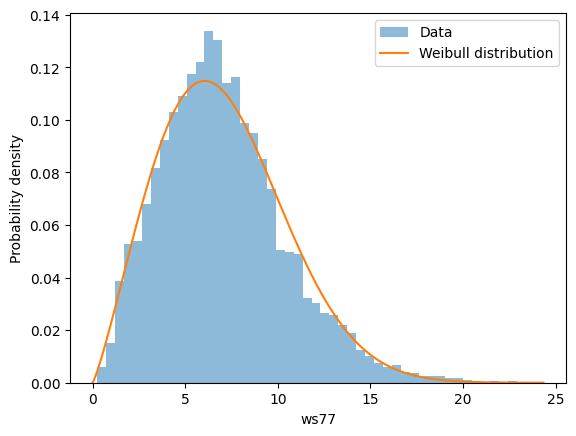

Error-in-K = 0.387008655529788
Error-in-A = 0.05221842314824432


In [74]:
# lets plot predicted weibull distribution and calculate error in k and a parameters

k_pred, a_pred = plot_weibull(pd.Series(preds_test, name='Predicted ws77 using Lasso'))

k_real, a_real = plot_weibull(y_test)

print(f"Error-in-K = {abs(k_pred - k_real)}")
print(f"Error-in-A = {abs(a_pred - a_real)}")

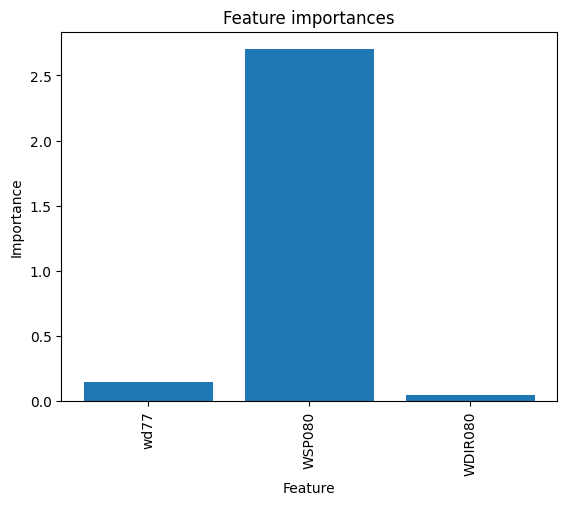

In [75]:
plot_feature_importances(regressor)

To conclude it seems like we got pretty good results using simple regression models instead of neural nets. We got r^2 around 75%, meaning we are able to explain around 75% of variance in data. What's interesting no matter whether we used a OLS or Ridge regression or Lasso regression, we got very similar results. This is probably because we don't have that many features. Also maybe models don't overfit that much, so the regularization doesn't have that much of an impact.

Our predicted wind speeds still quite nicely follow weibull distribution. Also when plotting real vs predicted wind speeds, we can see that they very much overlap, which is awesome.

It is not a surprise that wind speed from meso data seems to have the biggest impact on predicting mast wind speed.

### Now lets build the model for wind direction, same steps as before just different target variable

In [76]:
from sklearn.model_selection import TimeSeriesSplit

# first lets build model for wind speed
tscv = TimeSeriesSplit(n_splits=5)
X = all_data.drop(columns=['wd77'])
y = all_data['wd77']


for train_index, test_index in tscv.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [77]:
# Scaling time

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



MSE on train: 3974.3683762558317
MSE on test: 3593.0666249734218
R^2 score on train: 0.5283963855052938
R^2 score on test: 0.5280795751506424


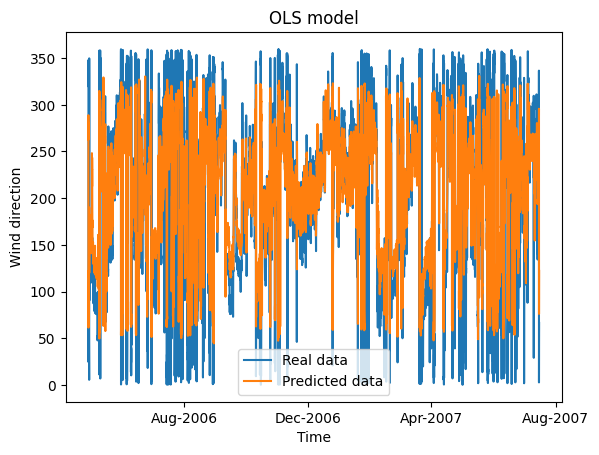

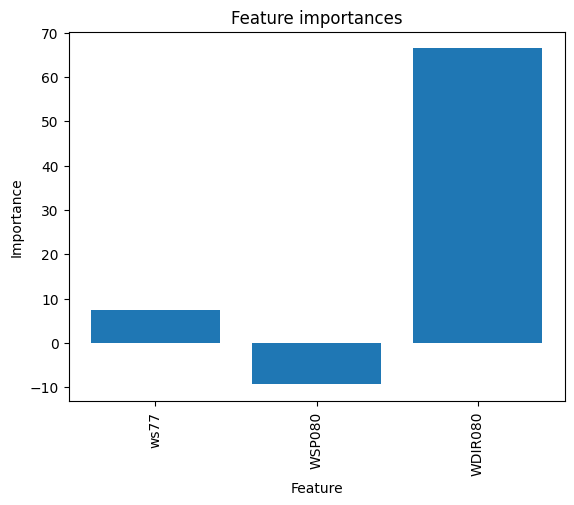

In [78]:
# OlS model

regressor = LinearRegression()

regressor.fit(X_train_scaled, y_train)

preds_train = regressor.predict(X_train_scaled)
preds_test = regressor.predict(X_test_scaled)

print(f"MSE on train: {mean_squared_error(y_train, preds_train)}")
print(f"MSE on test: {mean_squared_error(y_test, preds_test)}")
print(f"R^2 score on train: {regressor.score(X_train_scaled, y_train)}")
print(f"R^2 score on test: {regressor.score(X_test_scaled, y_test)}")

plot_real_vs_predicted(y_test, preds_test, 'Wind direction', "OLS model")

plot_feature_importances(regressor)


Best alpha: 3289.6661232878414
MSE on train: 3990.935003840753
MSE on test: 3610.666719170913
R^2 score on train: 0.5264305683717555
R^2 score on test: 0.5257679442241966


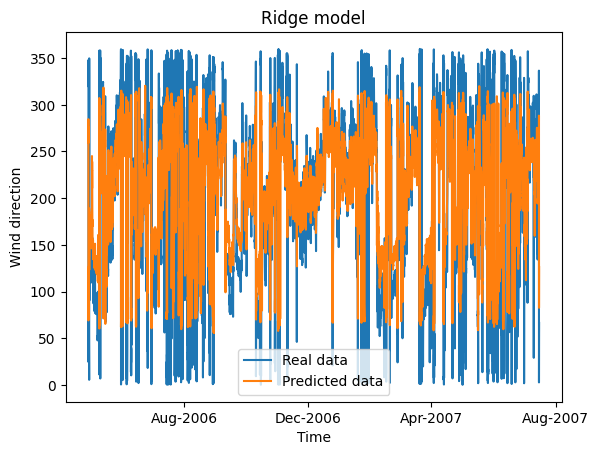

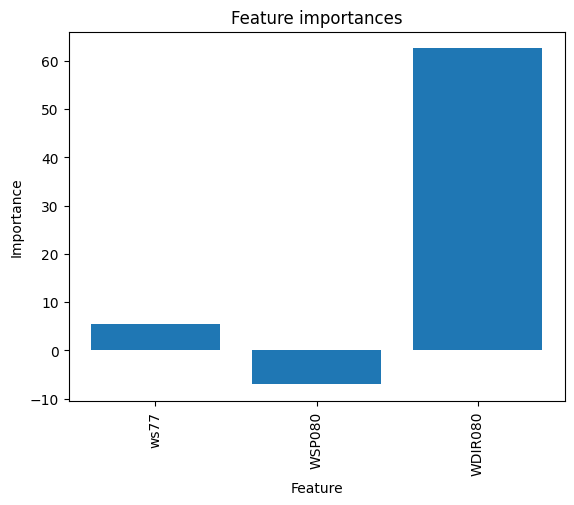

In [79]:
# Ridge 

cv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', cv=5)

cv.fit(X_train, y_train)

best_alpha = cv.alpha_

print(f"Best alpha: {best_alpha}")

regressor = Ridge(alpha=best_alpha)

regressor.fit(X_train_scaled, y_train)

preds_train = regressor.predict(X_train_scaled)

preds_test = regressor.predict(X_test_scaled)

print(f"MSE on train: {mean_squared_error(y_train, preds_train)}")
print(f"MSE on test: {mean_squared_error(y_test, preds_test)}")
print(f"R^2 score on train: {regressor.score(X_train_scaled, y_train)}")
print(f"R^2 score on test: {regressor.score(X_test_scaled, y_test)}")

plot_real_vs_predicted(y_test, preds_test, 'Wind direction', "Ridge model")

plot_feature_importances(regressor)


Best alpha: 0.006609705742330144
MSE on train: 3974.3689942035826
MSE on test: 3593.1111186080525
R^2 score on train: 0.5283963121788264
R^2 score on test: 0.5280737312693149


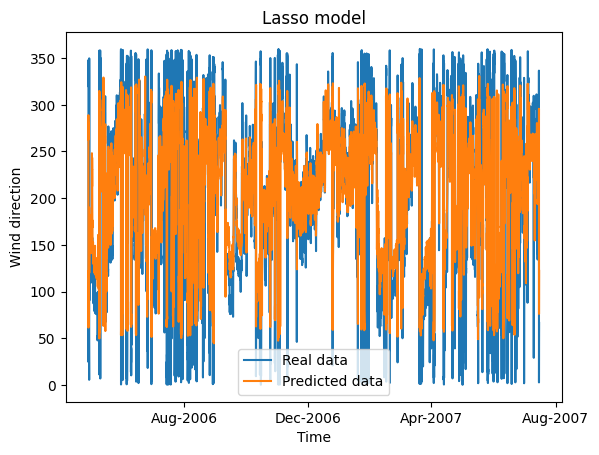

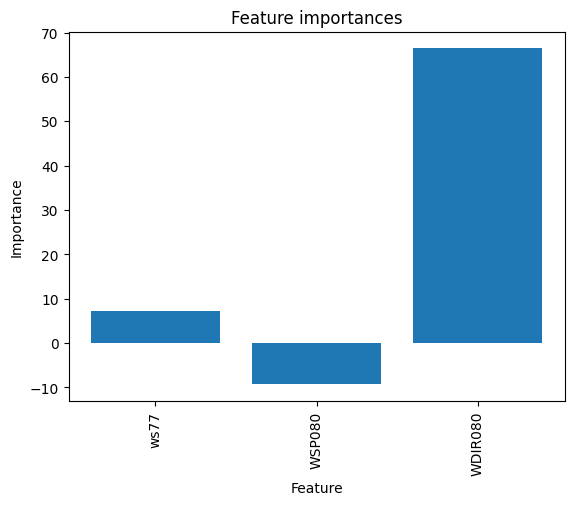

In [80]:
# Lasso

cv = LassoCV(alphas = alphas, cv=5)

cv.fit(X_train, y_train)

best_alpha = cv.alpha_

print(f"Best alpha: {best_alpha}")

regressor = Lasso(alpha=best_alpha)
regressor.fit(X_train_scaled, y_train)

preds_train = regressor.predict(X_train_scaled)
preds_test = regressor.predict(X_test_scaled)

print(f"MSE on train: {mean_squared_error(y_train, preds_train)}")
print(f"MSE on test: {mean_squared_error(y_test, preds_test)}")
print(f"R^2 score on train: {regressor.score(X_train_scaled, y_train)}")
print(f"R^2 score on test: {regressor.score(X_test_scaled, y_test)}")

plot_real_vs_predicted(y_test, preds_test, 'Wind direction', "Lasso model")

plot_feature_importances(regressor)


It seems like our models are better at predicting wind direction, from r^2 we see that in best case (lasso regression) we cover around 50% of variance. When we plot the data we can see that models have the biggest issues with predicting extreme values (close to 0 or 360), however the trend is predicted still quite nicely.
Also in this case the regularization does seem to have bigger impact as difference between ridge and lasso regression is much more obvious

It is no surprise that wind direction from meso data seems to have the biggest impact on predicting mast wind direction.